In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer
from IPython.display import Image
%matplotlib inline

Using TensorFlow backend.


In [2]:
# create random training data
Nclass = 500
D = 2 # dimensionality of input
M = 3 # hidden layer size
K = 3 # number of classes

X1 = np.random.randn(Nclass, D) + np.array([0, -2])
X2 = np.random.randn(Nclass, D) + np.array([2, 2])
X3 = np.random.randn(Nclass, D) + np.array([-2, 2])
X = np.vstack([X1, X2, X3]).astype(np.float32)

Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)
N = len(Y)

In [3]:
# labeling
lb = LabelBinarizer()
y = lb.fit_transform(Y)

/Users/yuki.ohnishi/.pyenv/versions/analysis/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


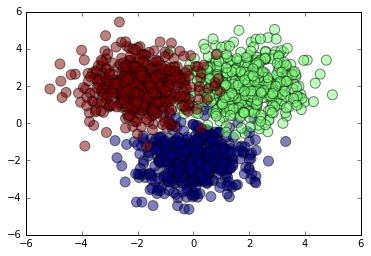

In [4]:
plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
plt.show()

下図のような3層のネットワークの構成します


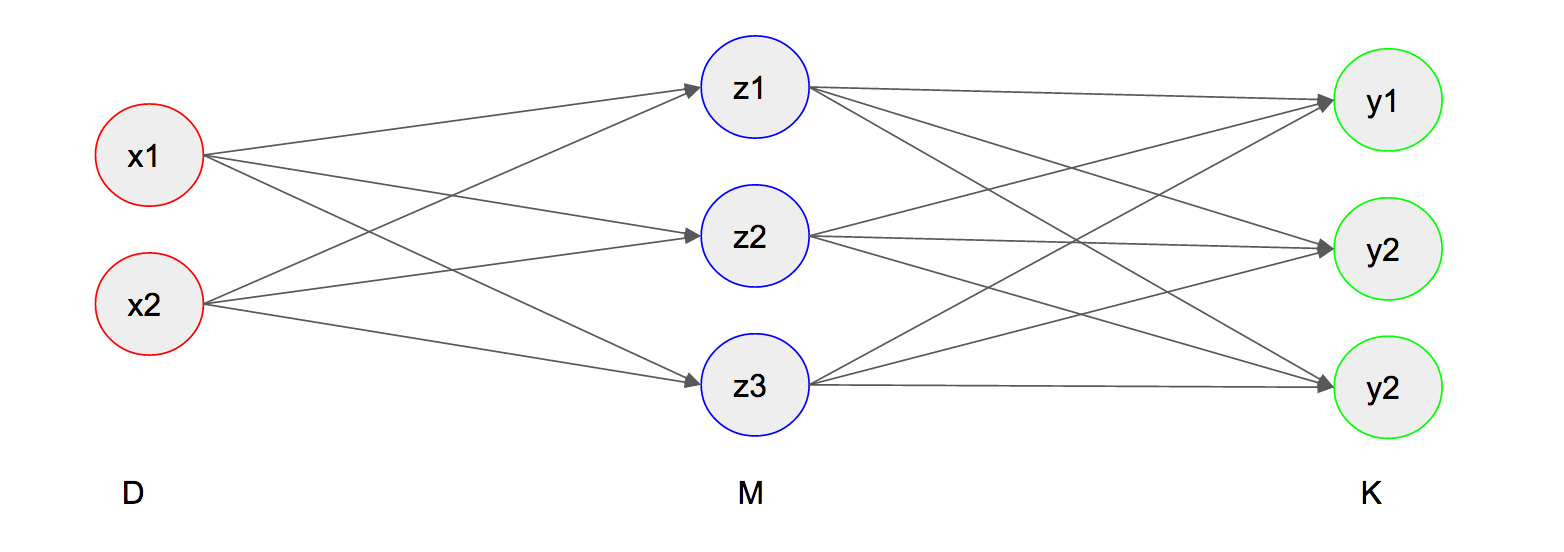

In [2]:
print("下図のような3層のネットワークの構成します")
Image(filename='../images/nn_3layer.png', width=500)

In [5]:
# modeling
model = Sequential()
model.add(Dense(M, input_shape=(D,)))
model.add(Activation("relu"))
model.add(Dense(K))
model.add(Activation("softmax"))
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 3)             9           dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 3)             0           dense_1[0][0]                    
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 3)             12          activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)        (None, 3)             0           dense_2[0][0]                    
Total params: 21
Trainable params: 21
Non-trainable params: 0
_____________________________

In [17]:
# learning
batch_size = N
nb_epoch = 1000
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
hist = model.fit(X, y, batch_size=batch_size, nb_epoch=nb_epoch, verbose=0, validation_split=0.2)

In [29]:
max(hist.history["acc"])

0.96083331108093262